# #001 Kaggle - Titanic - Machine Learning from Disaster



üë®üèª‚Äçüíª Primeira submiss√£o para competi√ß√£o no Kaggle. - https://www.kaggle.com/competitions/titanic



# üìùINTRODU√á√ÉO

> Essa √© a competi√ß√£o mais conhecida do Kaggle, considerada como sendo a recomendada para todos iniciantes.
> 
> **A ideia √©**: a partir de uma base de dados *test*, montar um modelo que possa identificar com a maior precis√£o poss√≠vel se um passageiro poderia ou n√£o morrer no acidente, dados algumas vari√°veis como g√™nero, idade, pre√ßo da passagem, classe econ√¥mica e etc.
>
> A inten√ß√£o principal √© conhecer as ferramentas utilizadas para manipula√ß√£o de arquivo (leitura e escrita), apresenta√ß√£o de dados (pandas e numpy), primeiro contato com gr√°ficos (seaborn) e chegar perto de Machine Learning 

# üìä EXPLORANDO OS DADOS

Nesse projeto a ideia √© ter um primeiro contato com as bibliotecas:<br>
* numpy
* pandas
* matplotlib
* seaborn

Al√©m de outras ferramentas, como sklearn e RandomForestClassifier, que ser√£o importantes na sequ√™ncia de estudos de aprendizado de m√°quina. 

In [1]:
# Importar as bibliotecas. 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

# Os arquivos base est√£o na pasta "/data/"
# Comando para listar todos os arquivos que ser√£o utilizados
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


In [3]:
# Ap√≥s listar os arquivos, utilizando pandas, setamos a base de dados train_data com a planilha TRAIN.CSV
# train_data ser√° a base que usaremos para treinar nosso modelo
train_data = pd.read_csv("data/train.csv")

# .head() mostra as primeiras linhas do arquivo, ajudando a mapear as informa√ß√µes que temos
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# .info() apresenta as informa√ß√µes do dataframe, como nome e quantidade de colunas, com a quantidade de c√©lular por cada uma
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Fazemos o mesmo processo para o dataframe que ser√° usado 
# para testar nosso modelo, ap√≥s o aprendizado com o df train_data

test_data = pd.read_csv("data/test.csv")
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

## Mapeando os dados
Precisamos come√ßar a mapear nossos arquivos, entendendo quais dados, colunas e arquivos podem ser relevantes para nosso modelo de treinamento.<br>
Nesse passo, √© importante ter uma vis√£o mais ampla de quais informa√ß√µes podem nos ajudar a tra√ßar perguntas, que ser√£o respondidas mais tardes.

In [6]:
# Vamos come√ßar com a separa√ß√£o por g√™nero

In [7]:
genero = train_data['Sex'].value_counts()
print(genero)

homens = genero['male']
mulheres = genero['female']

print(25*'- ')
masc_porc = genero['male']/(genero['male'] + genero['female'])*100
femi_porc = genero['female']/(genero['male'] + genero['female'])*100
print('Homens: {} ({:.2f}%)'.format(homens,masc_porc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,femi_porc))

male      577
female    314
Name: Sex, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - 
Homens: 577 (64.76%)
Mulheres: 314 (35.24%)


In [8]:
# Com nossos primeiros dados separados, vamos apresent√°-los usando matplotlib e seaborn

In [9]:
# Configura√ß√£o do seaborn
#Cores
cores_genero = ['#87CEFA','#FF69B4']
cores_tipo_vitima = ["#b08d57", "#C0C0C0", "#FFD700"]

#Paletas
paleta_genero = sns.color_palette(cores_genero)
paleta_classe_vitima = sns.color_palette(cores_tipo_vitima)

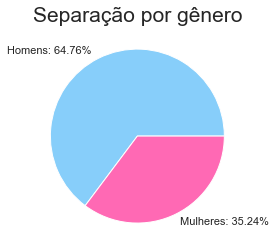

In [10]:
fig = plt.figure()
sns.set_style('white')
sns.set(font_scale=1)
# sexo = train_data['Sex'].value_counts()
sexo_num = [genero[0],genero[1]]
# percs = ['Homens: ' + str(round(masc_porc,2)) + '%','Mulheres: ' + str(round(femi_porc,2)) + '%']
# Treinando a linha anterior para boas pr√°ticas
percs = [f'Homens: {str(round(masc_porc,2))}% ',f'Mulheres: {str(round(femi_porc,2))}% ']
plt.pie(sexo_num, labels=percs,colors=paleta_genero)
plt.title('Separa√ß√£o por g√™nero',fontsize=21);

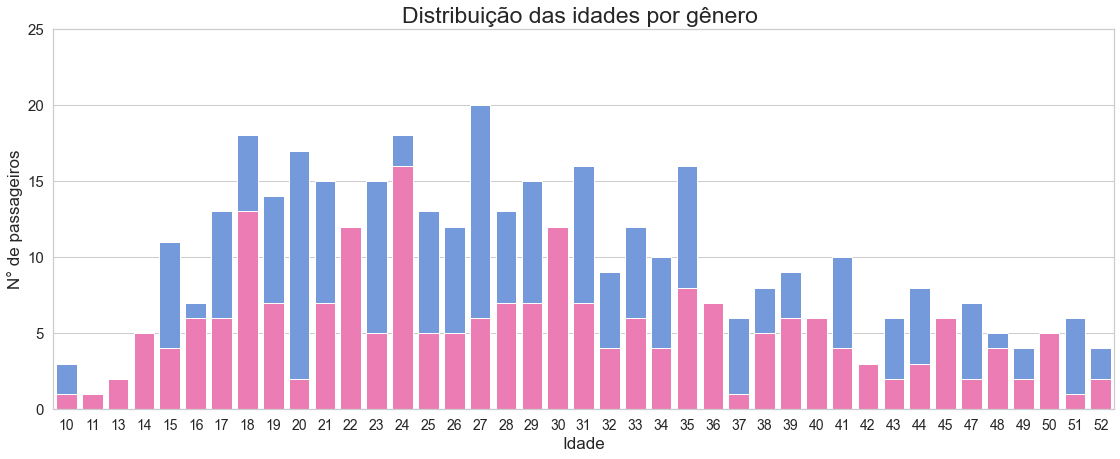

In [11]:
fig = plt.figure(figsize=(19,7))
sns.set_style('whitegrid')
df = train_data
df['idade_homem'] = df[df['Sex'] == 'male']['Age'] #idade das vitimas masculinas
df['idade_homem'] = df['idade_homem'].values.astype(int) #Transformar em int
df['idade_mulher'] = df[df['Sex'] == 'female']['Age'] #idade das vitimas femininas
df['idade_mulher'] = df['idade_mulher'].values.astype(int)
sns.countplot('idade_homem',color='#6495ED',data=df)
sns.countplot('idade_mulher',color='#FF69B4',data=df)
plt.xlim(10.5,51.5)
plt.xlabel('Idade',fontsize=17)
plt.ylabel('N¬∞ de passageiros',fontsize=17)
plt.ylim(0,25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.title('Distribui√ß√£o das idades por g√™nero ',fontsize=23);

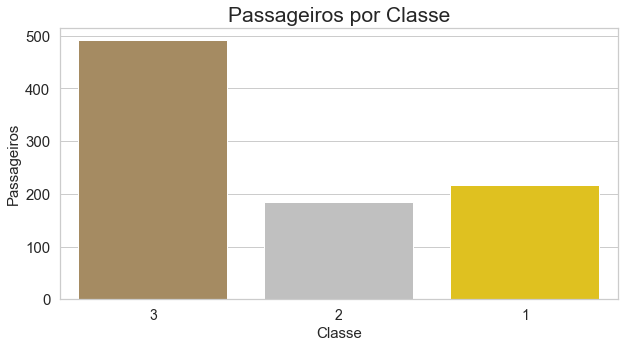

In [12]:
fig = plt.figure(figsize=(10,5))
y = train_data['Pclass'].count()
sns.countplot('Pclass',order=[3,2,1],palette=paleta_classe_vitima,data=train_data)
plt.xlim(-0.5,2.5)
plt.title('Passageiros por Classe',fontsize=21)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.xlabel('Classe', fontsize=15)
plt.ylabel('Passageiros',fontsize=15);


In [13]:
# Identificamos agora a quantidade de Homens e Mulheres que sobreviveram

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f'Total de mulheres que sobreviveram: {sum(women)}')
print(f'Total de mulheres no navio: {len(women)}')
print('')
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f'Total de homens que sobreviveram: {sum(men)}')
print(f'Total de homens no navio: {len(men)}')
print('')
print("% de mulheres que sobreviveram:", rate_women)
print("% de homens que sobreviveram:", rate_men)

Total de mulheres que sobreviveram: 233
Total de mulheres no navio: 314

Total de homens que sobreviveram: 109
Total de homens no navio: 577

% de mulheres que sobreviveram: 0.7420382165605095
% de homens que sobreviveram: 0.18890814558058924


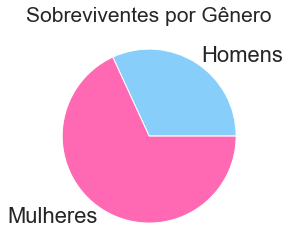

In [14]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(4,4))
sns.set_style('ticks')
sexo_num = [sum(men),sum(women)]
plt.pie(sexo_num, labels=['Homens','Mulheres'],colors=paleta_genero)
plt.title('Sobreviventes por G√™nero',fontsize=21);

### Percebemos que o n√∫mero de mulheres √© significantemente maior que o n√∫mero de homens. 

# Montando modelo de ML

In [15]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('resultado.csv', index=False)
print("Modelo salvo como 'resultado.csv'")

Modelo salvo como 'resultado.csv'


# Explorando o resultado

In [16]:
resultado = pd.read_csv("resultado.csv")
resultado.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1